# TV shows on Netflix, Prime Video, Hulu and Disney+
###  A quel site de streaming propose le meilleur contenue pour une personne adulte ?

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('./tv_shows.csv'); df.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5611 non-null   int64  
 1   Title            5611 non-null   object 
 2   Year             5611 non-null   int64  
 3   Age              3165 non-null   object 
 4   IMDb             4450 non-null   float64
 5   Rotten Tomatoes  1011 non-null   object 
 6   Netflix          5611 non-null   int64  
 7   Hulu             5611 non-null   int64  
 8   Prime Video      5611 non-null   int64  
 9   Disney+          5611 non-null   int64  
 10  type             5611 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 482.3+ KB


##### On voit que la plupart des données sont des int, mais certaine sont des objects qui pourrais nous interresser sous la forme d'un int ou d'un float comme les colonnes Age et Rotten Tomatoes

On met l'age à 0 puisque si il n'est pas défini, c'est que la serie ou le film est tout publique

In [7]:
df['Age'] = df['Age'].replace(np.nan, "0+")
df['Age'] = df['Age'].replace("all", "0+")
df['Age'] = df['Age'].map(lambda x: x[0:-1])
df['Age'] = pd.to_numeric(df['Age'])
df['Age']

0       18
1       16
2       18
3       16
4       18
        ..
5606     0
5607     0
5608     0
5609     0
5610     0
Name: Age, Length: 5611, dtype: int64

In [8]:
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].replace(np.nan, "0%")
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].map(lambda x: x[0:-1])
df['Rotten Tomatoes'] = pd.to_numeric(df['Rotten Tomatoes'])
df['Rotten Tomatoes']

0       96
1       93
2       91
3       78
4       97
        ..
5606     0
5607     0
5608     0
5609     0
5610     0
Name: Rotten Tomatoes, Length: 5611, dtype: int64

##### On modifie les valeurs à Age et Rotten Tomatoes pour pouvoir les manipuler
##### On assume que l'age est a 0 quand il n'est pas définit

In [9]:
df.describe()

,Unnamed: 0,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
count,5611.000000,5611.000000,5611.000000,4450.000000,5611.00000,5611.000000,5611.000000,5611.000000,5611.000000,5611.0
mean,2805.000000,2011.021030,6.376047,7.113258,13.96489,0.344145,0.312600,0.382107,0.032080,1.0
std,1619.900511,11.005116,7.525673,1.132060,31.04382,0.475131,0.463594,0.485946,0.176228,0.0
min,0.000000,1901.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.0
25%,1402.500000,2010.000000,0.000000,6.600000,0.00000,0.000000,0.000000,0.000000,0.000000,1.0
50%,2805.000000,2015.000000,0.000000,7.300000,0.00000,0.000000,0.000000,0.000000,0.000000,1.0
75%,4207.500000,2017.000000,16.000000,7.900000,0.00000,1.000000,1.000000,1.000000,0.000000,1.0
max,5610.000000,2020.000000,18.000000,9.600000,100.00000,1.000000,1.000000,1.000000,1.000000,1.0


In [10]:
df_net = df[df['Netflix'] == 1]
df_net = df_net[df_net['IMDb'] > 0]
df_net = df_net[df_net['Rotten Tomatoes'] > 0]

In [11]:
df_hulu = df[df['Hulu'] == 1]
df_hulu = df_hulu[df_hulu['IMDb'] > 0]
df_hulu = df_hulu[df_hulu['Rotten Tomatoes'] > 0]

In [12]:
df_prime = df[df['Prime Video'] == 1]
df_prime = df_prime[df_prime['IMDb'] > 0]
df_prime = df_prime[df_prime['Rotten Tomatoes'] > 0]

In [13]:
df_disney = df[df['Disney+'] == 1]
df_disney = df_disney[df_disney['IMDb'] > 0]
df_disney = df_disney[df_disney['Rotten Tomatoes'] > 0]

On cherche a ce rapprocher du meilleur ratio de notes pour chaque site de streaming afin de déterminer le ou les site qui propose le contenu le plus qualitatif.

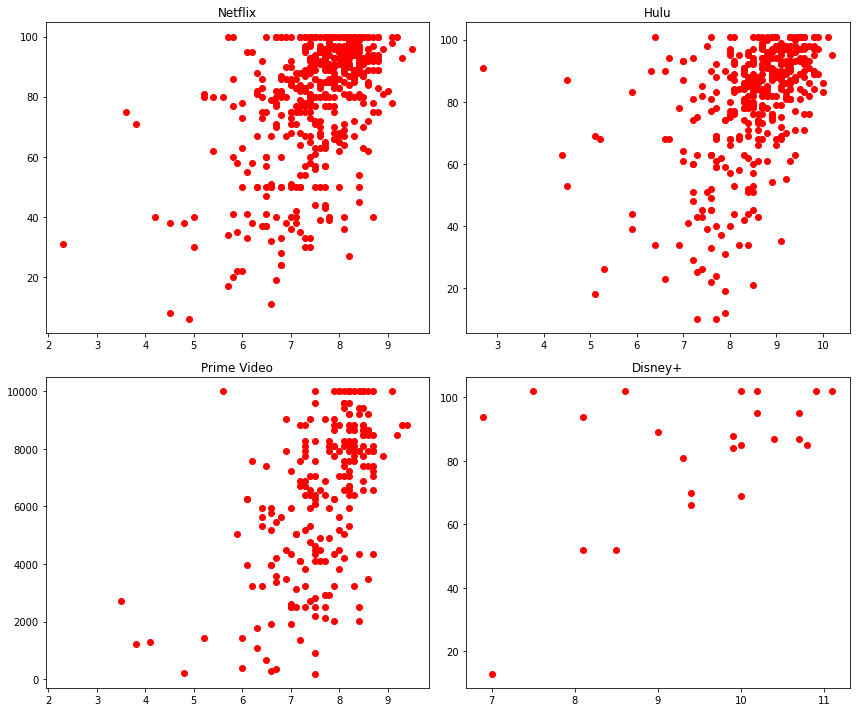

<Figure size 1080x288 with 0 Axes>

In [14]:
fig, axs = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(12)
plt.figure(figsize=(15,4))
axs[0, 0].plot(df_net.IMDb, df_net['Rotten Tomatoes'], 'ro')
axs[0, 0].set_title("Netflix")
axs[1, 0].plot(df_prime.IMDb, df_prime['Rotten Tomatoes']**2, 'ro')
axs[1, 0].set_title("Prime Video")
axs[1, 0].sharex(axs[0, 0])
axs[0, 1].plot(df_hulu.IMDb + 1, df_hulu['Rotten Tomatoes'] + 1, 'ro')
axs[0, 1].set_title("Hulu")
axs[1, 1].plot(df_disney.IMDb + 2, df_disney['Rotten Tomatoes'] + 2, 'ro')
axs[1, 1].set_title("Disney+")
fig.tight_layout()

Je pense que Netflix et a Hulu ont des meilleur notes que Prime et Disney+ car on peut voir que les notes données par les organisme IMDb et Rotten Tomatoes on une plus grande densité de point au niveau des meilleurs notes

<AxesSubplot:>

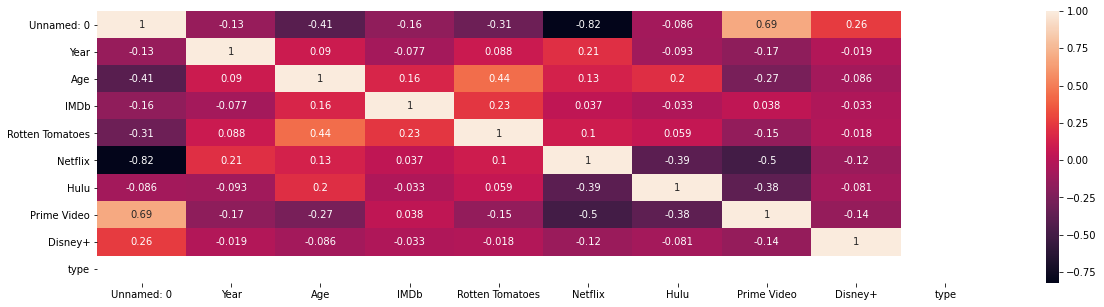

In [15]:
corr = df.corr();
f, ax = plt.subplots(figsize=(20,5))
sns.heatmap(corr, annot=True, ax =ax)

Je pense que les notes données par Rotten Tomatoes sont correlés à la limite d'age du film ou de la série car on peut voir une corrélation de 0.44 entre les deux valeur.

Je pense également que les sites Netflix et Hulu proposent du contenu plus adulte car on peut voir une corrélation de 0.13 et 0.2 respectivement entre l'age et les deux sites.

Je pense que l'on peu également dire que Prime Vidéo propose du contenu plus jeune, car on peut voir une correlation négative entre l'age et le site Prime Video

#### Notre adulte adore particulierement les films avec de la tention, du sang, et surtout qui ne sont pas "gnangnan". Il nous dit que la plupart de ses films préferés sont classés dans la catégorie 16+

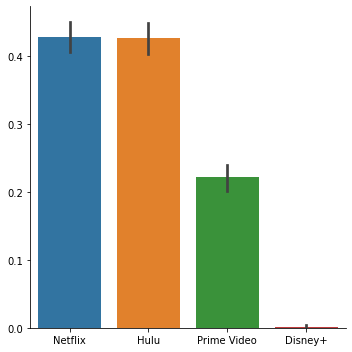

In [56]:
df_16 = df[df['Age'] > 15]
df_site = df_16.iloc[:,6:-1]
sns.catplot(data=df_site, kind="bar", height=5)

Je pense que Netflix et Hulu propose une plus grande quantité de contenu plus adulte car on peut voir sur le graphique que d'après le dataset, Netflix et Hulu possède plus de contenu 16+

#### Je pense donc que nous pouvons équarter pour notre grand consommateur de séries la piste de Prime Vidéo et Disney+ car nous avons pu voir qu'il proposaient moins de contenu pour adulte, et qu'ils sont légèrement moins bien noté d'après notre Dataset. 

#### Le dernier critère qu'a notre client est qu'il souhaite avoir le plus de nouveauté possible, regardons les tendances entre Netflix et Hulu

/home/baptiste/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

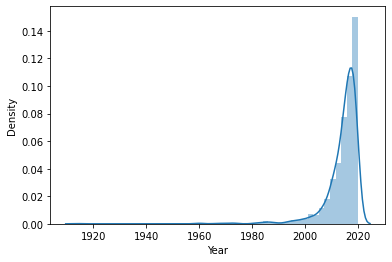

In [57]:
df_net = df[df['Netflix'] == 1]
sns.distplot(df_net.Year)

/home/baptiste/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

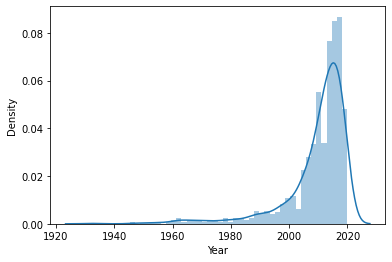

In [62]:
df_hulu = df[df['Hulu'] == 1]
sns.distplot(df_hulu.Year)

Nous manquons de précision ici, zoomons entre 2010 et 2019 (la dernième MAJ du dataset date de 2019) : 

/home/baptiste/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

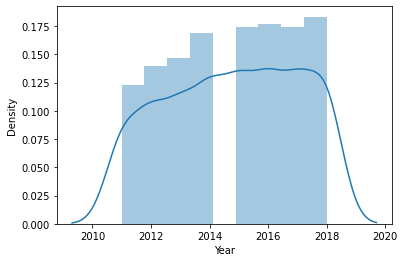

In [68]:
df_hulu = df_hulu[df_hulu['Year'] > 2010]
df_hulu = df_hulu[df_hulu['Year'] < 2019]
sns.distplot(df_hulu.Year)

/home/baptiste/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

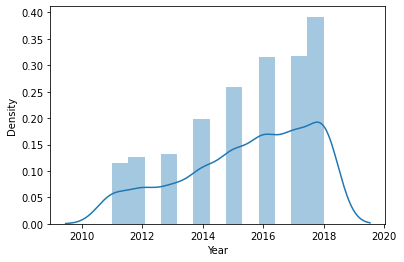

In [69]:
df_net = df_net[df_net['Year'] > 2010]
df_net = df_net[df_net['Year'] < 2019]
sns.distplot(df_net.Year)

Je pense que Netflix à une plus grande quantité de nouveauté comparé a la quantité de nouveauté de Hulu car on peut voir sur les deux graphiques que la densité de Netflix est supérieur à celle de Hulu (~ 0.20 > ~ 0.14)

Nous pouvons également remarqué que la tendance de Netflix est a la hausse alors que celle de Hulu est stagnante.